In [1]:
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

def get_temperature_df(file_path):
    

    df = pd.read_csv(file_path, sep=",", header = 14)

    temp_df = pd.DataFrame(columns={'date', 'mean_temperature'})

    temp_df['date'] = df['    DATE']
    temp_df['mean_temperature'] = df['   TG']/10.0

    temp_df['date'] = temp_df['date'].astype(str)

    def to_date_format(x):
        final_date = x[:4] + "-" + x[4:6] + "-" + x[6:8]
        return final_date
        

    temp_df['date'] = temp_df['date'].apply(to_date_format)
    temp_df['date'] = pd.to_datetime(temp_df['date'])

    temp_df.set_index('date', inplace=True)

    return temp_df


def get_previous_year_temp(date , years_duration, df):
    return df.loc[pd.to_datetime(date + years_duration * pd.Timedelta(days=365))]

def get_mean_temperature(date, years, df):
    temp_mean = 0

    for year in range(1, years + 1):
        temp_mean += get_previous_year_temp(date, year, df)
        temp_mean += get_previous_year_temp(date, -year, df)
        
    return temp_mean/(2 * years)

def impute_range_mean(df_limit, missing_value, years):

    missing_dates = pd.Series(df_limit.loc[df_limit['mean_temperature'] < missing_value].index.values)
    missing_temperatures = missing_dates.apply(get_mean_temperature, args=(years,df_limit))

    df_limit_copy = df_limit.copy()
    df_limit_copy.loc[df_limit['mean_temperature'] < missing_value] = missing_temperatures.values

    return df_limit_copy



In [2]:
temp_df = get_temperature_df("data/BerlinTempelhofMeanTemperature/TG_STAID002759.txt")
temp_df.loc[temp_df['mean_temperature'] < -998]

,mean_temperature
date,
1945-04-25,-999.9
1945-04-26,-999.9
1945-04-27,-999.9
1945-04-28,-999.9
1945-04-29,-999.9
...,...
1945-11-01,-999.9
1945-11-02,-999.9
1945-11-03,-999.9


In [3]:
temp_df_limit = temp_df.loc['1876-01-01':'2021-12-31']
temp_df_limit

,mean_temperature
date,
1876-01-01,2.2
1876-01-02,2.5
1876-01-03,0.3
1876-01-04,-5.8
1876-01-05,-9.8
...,...
2021-12-27,-3.9
2021-12-28,-0.5
2021-12-29,4.5


In [4]:
temp_df_limit = impute_range_mean(temp_df_limit, -998, 3)


In [5]:

temp_df_limit.loc['1945-04-25':'1945-11-05']



,mean_temperature
date,
1945-04-25,11.250000
1945-04-26,10.783333
1945-04-27,10.683333
1945-04-28,9.750000
1945-04-29,9.916667
...,...
1945-11-01,5.816667
1945-11-02,5.816667
1945-11-03,6.216667


<AxesSubplot:xlabel='date', ylabel='mean_temperature'>

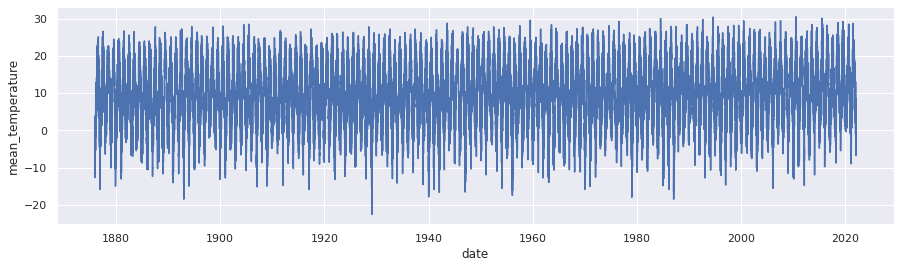

In [6]:


# temp_df_limit

# sns.set(rc={"figure.figsize":(15, 4)}) 
# sns.lineplot(data=temp_df_limit, y='mean_temperature', x = 'date')


In [7]:
temp_df_limit = temp_df_limit.resample('Y').mean()

temp_df_limit.loc['1935-12-31':'1945-12-31']

,mean_temperature
date,
1935-12-31,9.164384
1936-12-31,9.261202
1937-12-31,9.244384
1938-12-31,9.681918
1939-12-31,9.188219
1940-12-31,7.047814
1941-12-31,7.714247
1942-12-31,7.910685
1943-12-31,9.704110


In [8]:
length = len(temp_df_limit)

temp_df_limit = temp_df_limit.assign(timestep=list(range(length)))

X = temp_df_limit['timestep'].values
X = sm.add_constant(X)
y = temp_df_limit['mean_temperature'].values

model = sm.OLS(y,X)
results = model.fit()

results.params


array([8.54873439, 0.01199725])

In [9]:
slopes = np.full((len(X),2), [results.params[0], results.params[1]])
# constants = np.full(len(X), results.params[0])KC
slopes


array([[8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.54873439, 0.01199725],
       [8.

In [10]:

y_plot = np.sum(X*slopes, axis=1)
y_plot



array([ 8.54873439,  8.56073164,  8.57272888,  8.58472613,  8.59672338,
        8.60872063,  8.62071787,  8.63271512,  8.64471237,  8.65670962,
        8.66870687,  8.68070411,  8.69270136,  8.70469861,  8.71669586,
        8.7286931 ,  8.74069035,  8.7526876 ,  8.76468485,  8.77668209,
        8.78867934,  8.80067659,  8.81267384,  8.82467109,  8.83666833,
        8.84866558,  8.86066283,  8.87266008,  8.88465732,  8.89665457,
        8.90865182,  8.92064907,  8.93264631,  8.94464356,  8.95664081,
        8.96863806,  8.9806353 ,  8.99263255,  9.0046298 ,  9.01662705,
        9.0286243 ,  9.04062154,  9.05261879,  9.06461604,  9.07661329,
        9.08861053,  9.10060778,  9.11260503,  9.12460228,  9.13659952,
        9.14859677,  9.16059402,  9.17259127,  9.18458851,  9.19658576,
        9.20858301,  9.22058026,  9.23257751,  9.24457475,  9.256572  ,
        9.26856925,  9.2805665 ,  9.29256374,  9.30456099,  9.31655824,
        9.32855549,  9.34055273,  9.35254998,  9.36454723,  9.37

<AxesSubplot:xlabel='date', ylabel='mean_temperature'>

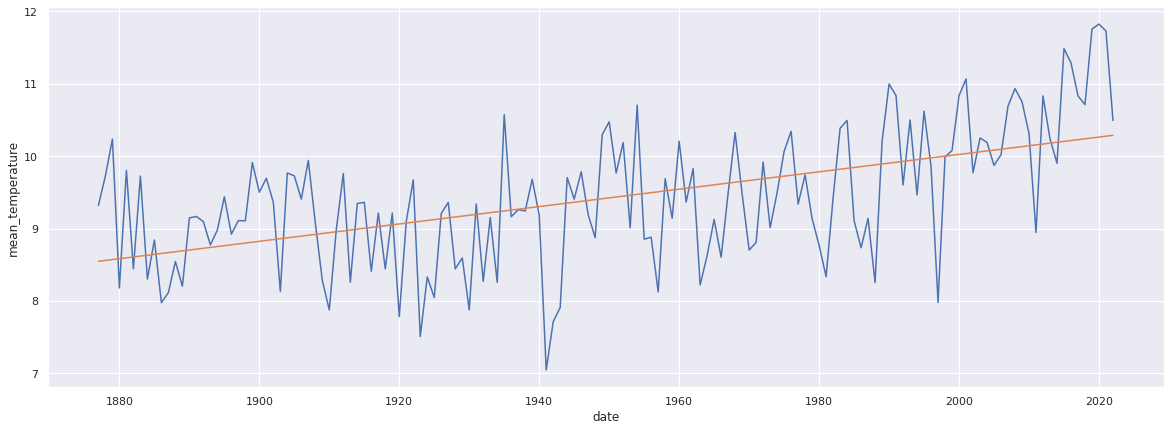

In [11]:

fig, ax = plt.subplots(figsize=(20,7))
sns.lineplot(data=temp_df_limit, y='mean_temperature', x='date', ax=ax)
sns.lineplot(y=y_plot, x=temp_df_limit.index, ax=ax)
